In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import numpy as np
import pandas as pd
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt
import itertools
from scipy.special import perm

# Tool Functions

In [12]:
from tools import rhcRunner, saRunner, gaRunner, mimicRunner, repeat_algorithm, compare, tune_max_attempts_plot, \
               problem_size_plot, iteration_plot, fitness_per_iteration_plot

# FlipFlop

## problem set

In [4]:
N_list = [5, 10, 20, 30, 40, 50, 100]
problem_set = []
for N in N_list:
    print(f'Expected best score is {N-1}') # number of pairs
    # Initialize custom fitness function object
    flipFlop_fitness_func = mlrose.FlipFlop()
    problem_flipFlop = mlrose.DiscreteOpt(length=N, fitness_fn=flipFlop_fitness_func, maximize=True, max_val=2)
    problem_set.append(problem_flipFlop)

Expected best score is 4
Expected best score is 9
Expected best score is 19
Expected best score is 29
Expected best score is 39
Expected best score is 49
Expected best score is 99


## complex problem

In [5]:
N_complex = 50
print(f'Expected best score is {N_complex-1}') # number of pairs
# Initialize custom fitness function object
flipFlop_fitness_func = mlrose.FlipFlop()
problem_flipFlop_complex = mlrose.DiscreteOpt(length=N_complex, fitness_fn=flipFlop_fitness_func, maximize=True, max_val=2)

Expected best score is 49


### RHC

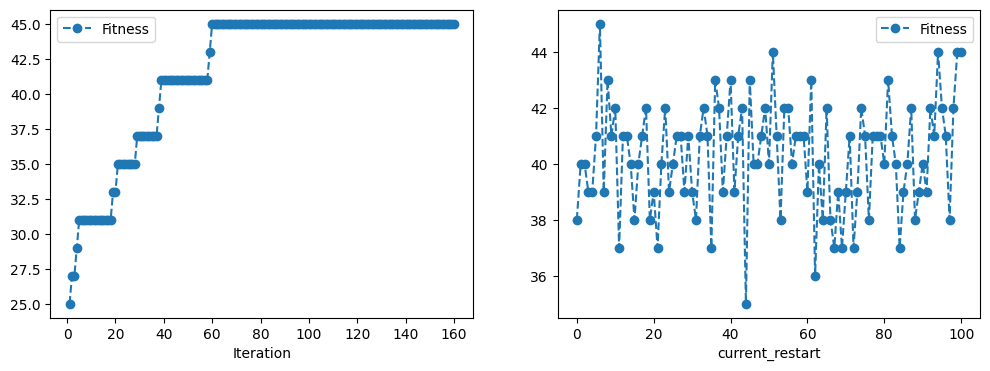

Best fitness is 45.
Best parameter is {'current_restart': 6, 'max_iters': 500, 'Iteration': 60}.
Iteration to converge or stop is 60.
Time spent is 0.155632 seconds.
Time per iteration is 0.000123 seconds.
CPU times: user 36.7 s, sys: 369 ms, total: 37.1 s
Wall time: 48.6 s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x169f8d610>,
 'iteration_list': [500],
 'max_attempts': 100,
 'restart_num': 100}

In [33]:
%%time
params = {
    'problem': problem_flipFlop_complex,
    'iteration_list': [500],
    'max_attempts': 50, #20
    'restart_num': 100
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = rhcRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_flipFlop_rhc = {
    'problem': problem_flipFlop_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'restart_num': params['restart_num']
}
params_complex_flipFlop_rhc

In [6]:
# params_complex_flipFlop_rhc = {
#     'problem': problem_flipFlop_complex,
#  'iteration_list': [500],
#  'max_attempts': 100,
#  'restart_num': 100
# }

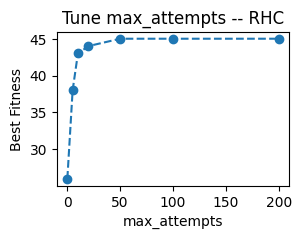

CPU times: user 2min 41s, sys: 848 ms, total: 2min 42s
Wall time: 3min 53s


In [34]:
%%time
fitness_list = tune_max_attempts_plot(rhcRunner, 
                                      'RHC',
                                      attempts_list=[0,5,10,20,50,100,200], 
                                      best_params=params_complex_flipFlop_rhc)

### SA

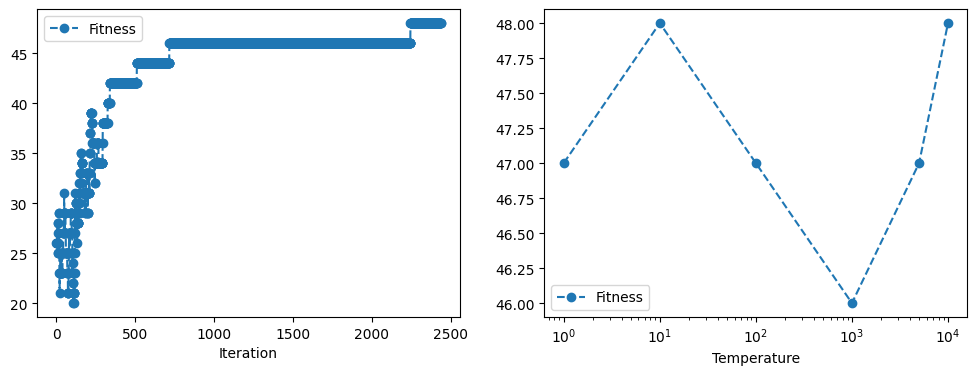

Best fitness is 48.
Best parameter is {'Temperature': 10, 'max_iters': 5000, 'Iteration': 2245}.
Iteration to converge or stop is 2245.
Time spent is 0.298909 seconds.
Time per iteration is 0.000133 seconds.
CPU times: user 4.46 s, sys: 150 ms, total: 4.61 s
Wall time: 5.9 s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x169f8d610>,
 'iteration_list': [5000],
 'max_attempts': 50,
 'temperature_list': [10]}

In [35]:
%%time
params = {
    'problem': problem_flipFlop_complex,
    'iteration_list': [5000],
    'max_attempts': 50,
    'temperature_list': [1, 10, 100, 1000, 5000,10000]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = saRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_flipFlop_sa = {
    'problem': problem_flipFlop_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'temperature_list': [best_param['Temperature']]
}
params_complex_flipFlop_sa

In [7]:
# params_complex_flipFlop_sa = {
#     'problem': problem_flipFlop_complex,
#  'iteration_list': [5000],
#  'max_attempts': 50,
#  'temperature_list': [10]
# }

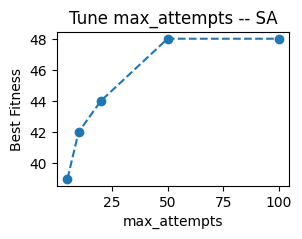

CPU times: user 1.67 s, sys: 104 ms, total: 1.78 s
Wall time: 2.25 s


In [36]:
%%time
fitness_list = tune_max_attempts_plot(saRunner, 
                                      'SA',
                                      attempts_list=[5,10,20,50,100], 
                                      best_params=params_complex_flipFlop_sa)

### GA

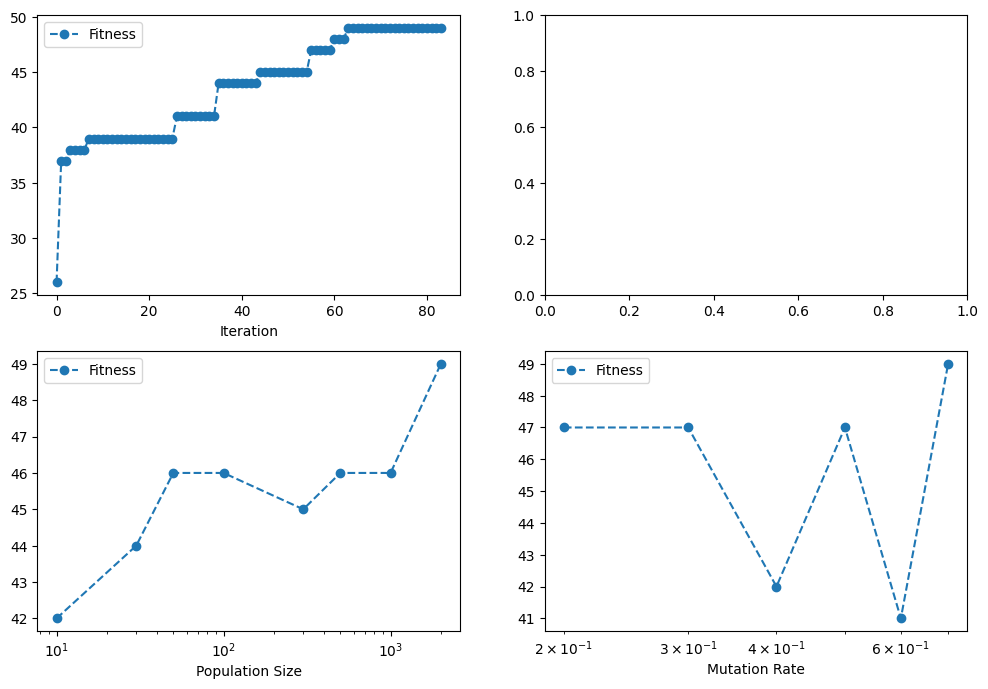

Best fitness is 49.
Best parameter is {'Population Size': 2000, 'Mutation Rate': 0.7, 'max_iters': 5000, 'Iteration': 63}.
Iteration to converge or stop is 63.
Time spent is 0.024231 seconds.
Time per iteration is 0.000385 seconds.
CPU times: user 1min 7s, sys: 428 ms, total: 1min 8s
Wall time: 1min 37s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x169f8d610>,
 'iteration_list': [5000],
 'max_attempts': 20,
 'population_sizes': [2000],
 'mutation_rates': [0.7]}

In [37]:
%%time
params = {
    'problem': problem_flipFlop_complex,
    'iteration_list': [5000],
    'max_attempts': 20,
    'population_sizes': [10, 30, 50, 100, 300, 500, 1000, 2000],
    'mutation_rates': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = gaRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_flipFlop_ga = {
    'problem': problem_flipFlop_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'population_sizes': [best_param['Population Size']],
    'mutation_rates': [best_param['Mutation Rate']]
}
params_complex_flipFlop_ga

In [9]:
# params_complex_flipFlop_ga = {
#     'problem': problem_flipFlop_complex,
#  'iteration_list': [5000],
#  'max_attempts': 20,
#  'population_sizes': [2000],
#  'mutation_rates': [0.7]
# }

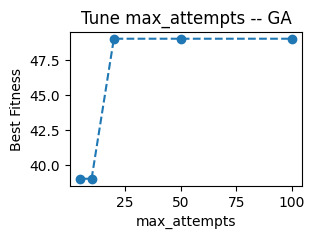

CPU times: user 37.4 s, sys: 242 ms, total: 37.7 s
Wall time: 54.1 s


In [38]:
%%time
fitness_list = tune_max_attempts_plot(gaRunner, 
                                      'GA',
                                      attempts_list=[5,10,20,50,100], 
                                      best_params=params_complex_flipFlop_ga)

### MIMIC

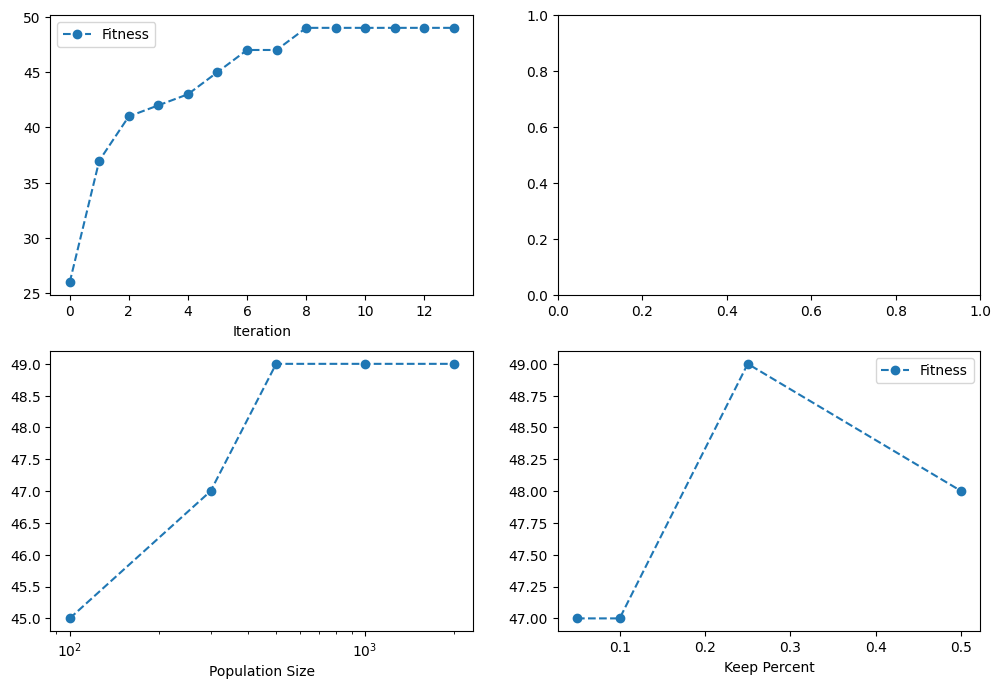

Best fitness is 49.
Best parameter is {'Population Size': 500, 'Keep Percent': 0.25, 'max_iters': 100, 'Iteration': 8}.
Iteration to converge or stop is 8.
Time spent is 0.038902 seconds.
Time per iteration is 0.004863 seconds.
CPU times: user 7.26 s, sys: 463 ms, total: 7.72 s
Wall time: 7.27 s


{'problem': <mlrose_hiive.opt_probs.discrete_opt.DiscreteOpt at 0x169f8d610>,
 'iteration_list': [100],
 'max_attempts': 5,
 'population_sizes': [500],
 'keep_percent_list': [0.25]}

In [51]:
%%time
params = {
    'problem': problem_flipFlop_complex,
    'iteration_list': [100],
    'max_attempts': 5,
    'population_sizes': [100, 300, 500, 1000, 2000],
    'keep_percent_list': [0.05, 0.1, 0.25, 0.5]
}
best_fitness, best_param, iter_num, time_s, iter_time_s, f_evals = mimicRunner(**params)
print(f'Best fitness is {best_fitness}.')
print(f'Best parameter is {best_param}.')
print(f'Iteration to converge or stop is {iter_num}.')
print(f'Time spent is {time_s} seconds.')
print(f'Time per iteration is {iter_time_s} seconds.')
params_complex_flipFlop_mimic = {
    'problem': problem_flipFlop_complex,
    'iteration_list': params['iteration_list'],
    'max_attempts': params['max_attempts'],
    'population_sizes': [best_param['Population Size']],
    'keep_percent_list': [best_param['Keep Percent']]
}
params_complex_flipFlop_mimic

In [10]:
# params_complex_flipFlop_mimic = {
#     'problem': problem_flipFlop_complex,
#  'iteration_list': [100],
#  'max_attempts': 5,
#  'population_sizes': [500],
#  'keep_percent_list': [0.25]
# }

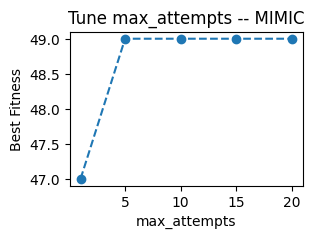

CPU times: user 2.77 s, sys: 168 ms, total: 2.94 s
Wall time: 4.16 s


In [40]:
%%time
fitness_list = tune_max_attempts_plot(mimicRunner, 
                                      'MIMIC',
                                      attempts_list=[1, 5, 10, 15, 20], 
                                      best_params=params_complex_flipFlop_mimic)

### compare

In [41]:
%%time
problem=problem_flipFlop_complex
RHC_params=params_complex_flipFlop_rhc
SA_params=params_complex_flipFlop_sa
GA_params=params_complex_flipFlop_ga
MIMIC_params=params_complex_flipFlop_mimic
RHC_params['problem'] = problem
SA_params['problem'] = problem
GA_params['problem'] = problem
MIMIC_params['problem'] = problem
rhc_result = repeat_algorithm(rhcRunner, RHC_params)
rhc_result.index = ['RHC']
sa_result = repeat_algorithm(saRunner, SA_params)
sa_result.index = ['SA']
ga_result = repeat_algorithm(gaRunner, GA_params)
ga_result.index = ['GA']
mimic_result = repeat_algorithm(mimicRunner, MIMIC_params)
mimic_result.index = ['MIMIC']
result = pd.concat([rhc_result, sa_result, ga_result, mimic_result])
result

CPU times: user 3min 48s, sys: 840 ms, total: 3min 49s
Wall time: 5min 13s


,best_fitness,mean_fitness,iter_num,converge_time_s,iter_time,func_evals
RHC,46,45,122,0.988043,0.000100,8679
SA,48,47,1596,0.545314,0.000287,2024
GA,49,44,34,4.241028,0.122337,71240
MIMIC,49,48,8,0.272038,0.031618,4815


In [12]:
# %%time
# compare(problem_flipFlop_complex, 
#         RHC_params=params_complex_flipFlop_rhc, 
#         SA_params=params_complex_flipFlop_sa, 
#         GA_params=params_complex_flipFlop_ga, 
#         MIMIC_params=params_complex_flipFlop_mimic
#        )

#### problem size

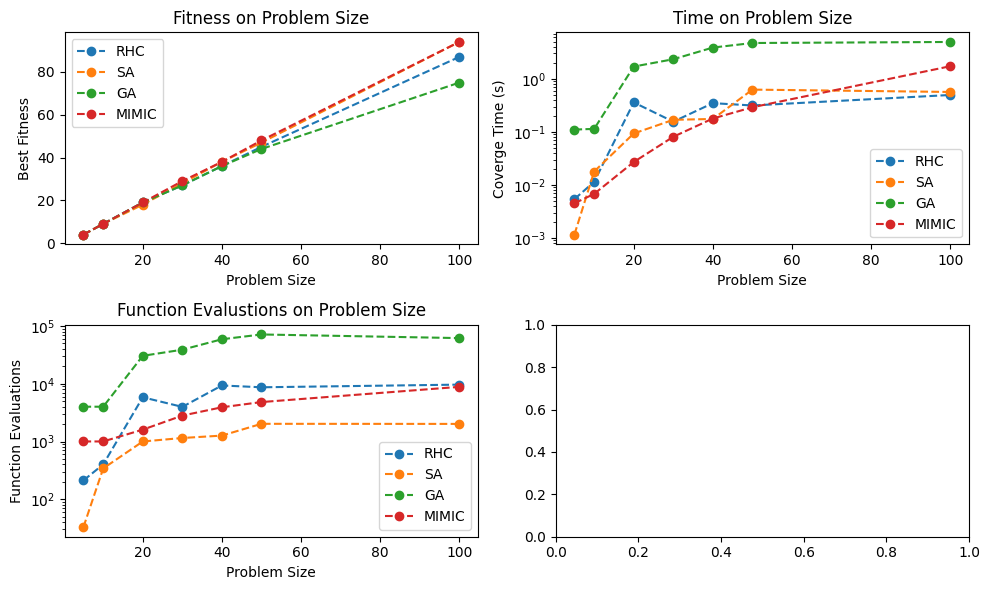

CPU times: user 20min 25s, sys: 6.47 s, total: 20min 32s
Wall time: 27min 2s


,5,10,20,30,40,50,100
fitness_RHC,4.000000,9.000000,19.000000,27.000000,36.000000,45.000000,87.000000
converge_time_RHC,0.005404,0.011489,0.359146,0.155780,0.347911,0.314433,0.495777
func_evals_RHC,212.000000,401.000000,5827.000000,3974.000000,9329.000000,8679.000000,9651.000000
fitness_SA,4.000000,9.000000,18.000000,28.000000,38.000000,47.000000,94.000000
converge_time_SA,0.001162,0.017932,0.093356,0.168856,0.175100,0.625748,0.565294
func_evals_SA,33.000000,342.000000,1001.000000,1150.000000,1265.000000,2024.000000,2016.000000
fitness_GA,4.000000,9.000000,19.000000,27.000000,36.000000,44.000000,75.000000
converge_time_GA,0.110516,0.113984,1.700633,2.337616,3.877996,4.724451,4.943478
func_evals_GA,4002.000000,4002.000000,30417.000000,38822.000000,58833.000000,71240.000000,61635.000000
fitness_MIMIC,4.000000,9.000000,19.000000,29.000000,38.000000,48.000000,94.000000


In [49]:
%%time
best_params_list = [
    params_complex_flipFlop_rhc,
    params_complex_flipFlop_sa,
    params_complex_flipFlop_ga,
    params_complex_flipFlop_mimic
]
N_result = problem_size_plot(N_list, problem_set, best_params_list, repeat=5)
N_result

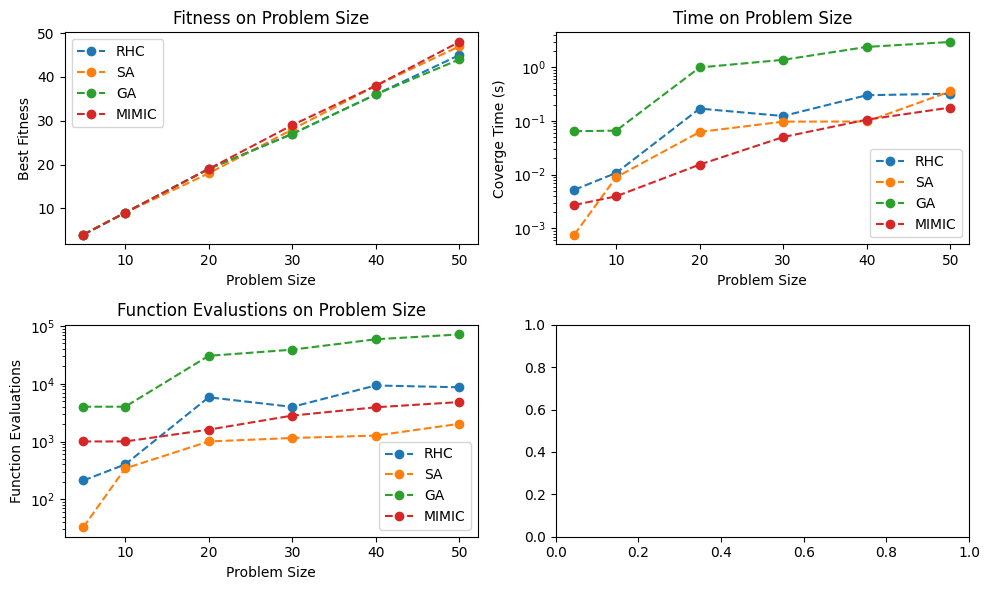

CPU times: user 11min 11s, sys: 3.91 s, total: 11min 15s
Wall time: 11min 19s


,5,10,20,30,40,50
fitness_RHC,4.000000,9.000000,19.000000,27.000000,36.000000,45.000000
converge_time_RHC,0.005218,0.010774,0.170044,0.123736,0.302020,0.322289
func_evals_RHC,212.000000,401.000000,5827.000000,3974.000000,9329.000000,8679.000000
fitness_SA,4.000000,9.000000,18.000000,28.000000,38.000000,47.000000
converge_time_SA,0.000764,0.008958,0.062445,0.097225,0.097806,0.355530
func_evals_SA,33.000000,342.000000,1001.000000,1150.000000,1265.000000,2024.000000
fitness_GA,4.000000,9.000000,19.000000,27.000000,36.000000,44.000000
converge_time_GA,0.064398,0.066076,0.993799,1.378777,2.398239,2.966568
func_evals_GA,4002.000000,4002.000000,30417.000000,38822.000000,58833.000000,71240.000000
fitness_MIMIC,4.000000,9.000000,19.000000,29.000000,38.000000,48.000000


In [47]:
%%time
best_params_list = [
    params_complex_flipFlop_rhc,
    params_complex_flipFlop_sa,
    params_complex_flipFlop_ga,
    params_complex_flipFlop_mimic
]
N_result = problem_size_plot(N_list, problem_set, best_params_list, repeat=5)
N_result

#### iteration

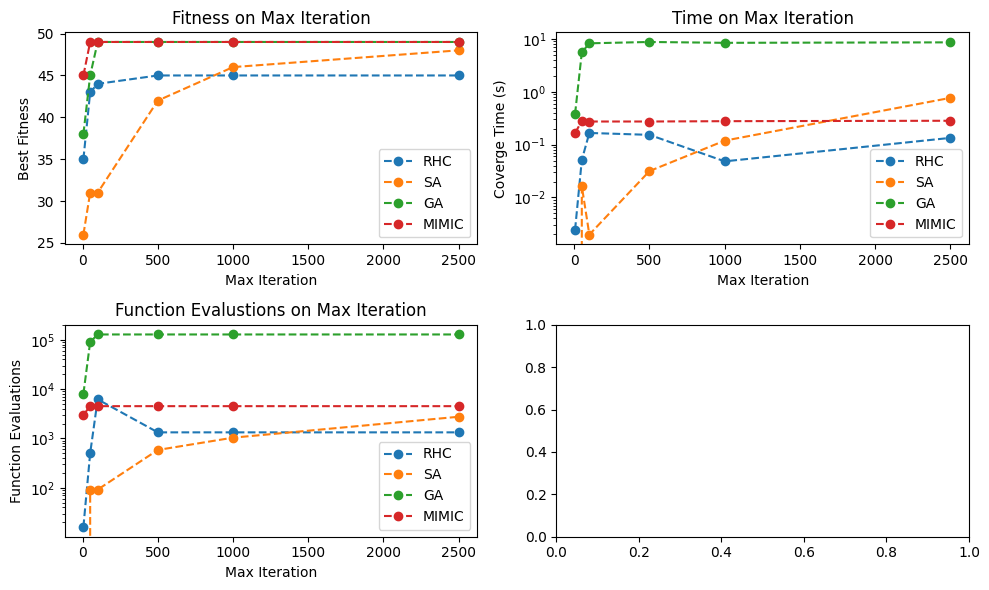

CPU times: user 2min 48s, sys: 987 ms, total: 2min 49s
Wall time: 3min 50s


,5,50,100,500,1000,2500
fitness_RHC,35.000000,43.000000,44.000000,45.000000,45.000000,45.000000
converge_time_RHC,0.002425,0.051331,0.166352,0.153140,0.048228,0.134088
func_evals_RHC,16.000000,502.000000,6204.000000,1330.000000,1330.000000,1330.000000
fitness_SA,26.000000,31.000000,31.000000,42.000000,46.000000,48.000000
converge_time_SA,0.000000,0.016316,0.001978,0.031575,0.118959,0.767196
func_evals_SA,0.000000,92.000000,92.000000,585.000000,1038.000000,2753.000000
fitness_GA,38.000000,45.000000,49.000000,49.000000,49.000000,49.000000
converge_time_GA,0.379941,5.582572,8.292676,8.794701,8.470873,8.645503
func_evals_GA,8005.000000,90050.000000,128072.000000,128072.000000,128072.000000,128072.000000
fitness_MIMIC,45.000000,49.000000,49.000000,49.000000,49.000000,49.000000


In [50]:
%%time
best_params_list = [
    params_complex_flipFlop_rhc,
    params_complex_flipFlop_sa,
    params_complex_flipFlop_ga,
    params_complex_flipFlop_mimic
]
iter_list = [5, 50, 100, 500, 1000, 2500]
iteration_plot(iter_list, best_params_list, repeat=1)

plot RHC...
plot SA...
plot GA...
plot MIMIC...


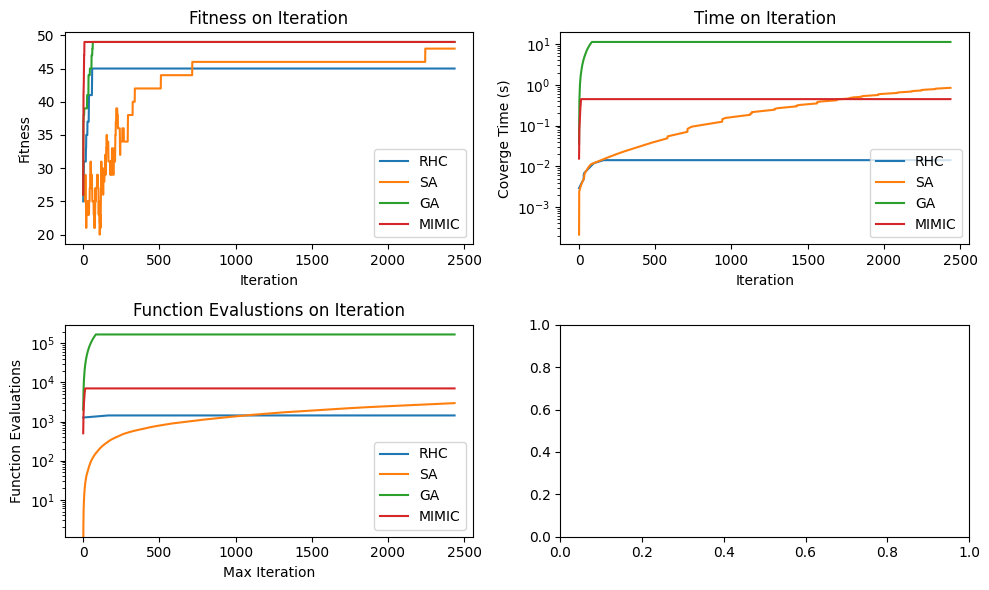

CPU times: user 46.5 s, sys: 463 ms, total: 46.9 s
Wall time: 1min 4s


In [22]:
%%time
best_params_list = [
    params_complex_flipFlop_rhc,
    params_complex_flipFlop_sa,
    params_complex_flipFlop_ga,
    params_complex_flipFlop_mimic
]
fitness_per_iteration_plot(best_params_list)